In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('C:/Users/govindd1/Desktop/Code/VR-Project/ACC_data_from_different_subjects/E4_ACC_data_3.csv')
df.head()

,datetime,acc_x,acc_y,acc_z,subject_id,round,type,label
0,2021-12-08 14:50:11+00:00,-6,22,62,3,1,InMotion,downstairs
1,2021-12-08 14:50:11.031250+00:00,-7,20,61,3,1,InMotion,downstairs
2,2021-12-08 14:50:11.062500+00:00,-7,18,59,3,1,InMotion,downstairs
3,2021-12-08 14:50:11.093750+00:00,-8,16,58,3,1,InMotion,downstairs
4,2021-12-08 14:50:11.125000+00:00,-7,16,57,3,1,InMotion,downstairs


In [3]:
df.subject_id.value_counts()

8    4796
6    3766
7    3546
3    2772
Name: subject_id, dtype: int64

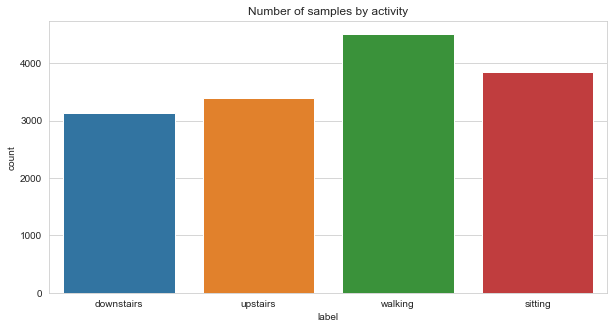

In [4]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
sns.countplot(x = df.label, data = df)
plt.title('Number of samples by activity')
plt.show()

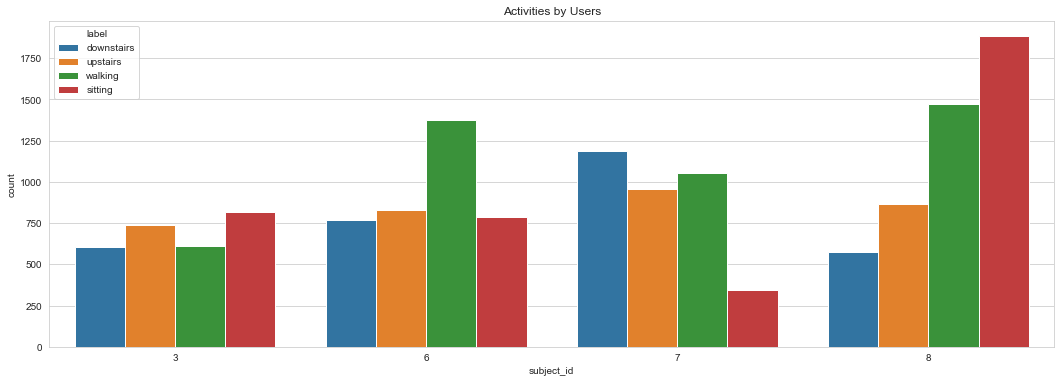

In [5]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'subject_id', hue = 'label', data = df)
plt.title('Activities by Users')
plt.show()

In [7]:
# for i in ['standing', 'downstairs', 'sitting', 'upstairs', 'walking']:
#   data_df = df[(df['subject_id'] == 3) & (df['label'] == i)][:400]
#   plt.figure(figsize = (15, 6))
#   sns.lineplot(y = 'acc_x', x = 'datatime', data = data_df)
#   sns.lineplot(y = 'acc_y', x = 'datatime', data = data_df)
#   sns.lineplot(y = 'acc_z', x = 'datatime', data = data_df)
#   plt.legend(['x-axis', 'y-axis', 'z-axis'])
#   plt.ylabel(i)
#   plt.title(i, fontsize = 15)
#   plt.show()

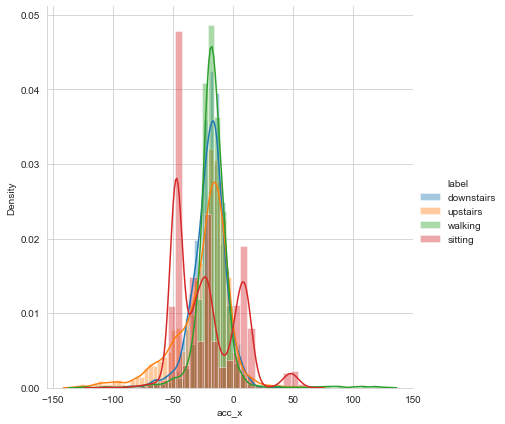

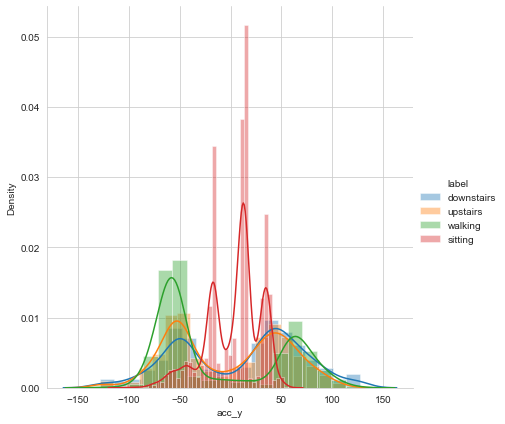

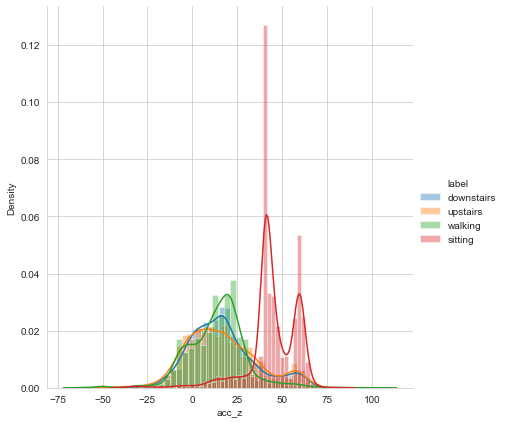

In [8]:
sns.FacetGrid(df, hue = 'label', height = 6).map(sns.distplot, 'acc_x').add_legend()

sns.FacetGrid(df, hue = 'label', height = 6).map(sns.distplot, 'acc_y').add_legend()

sns.FacetGrid(df, hue = 'label', height = 6).map(sns.distplot, 'acc_z').add_legend()


In [9]:
df_train = df[df['subject_id'] <= 7]
df_test = df[df['subject_id'] > 7]

print(df_test.count())

datetime      4796
acc_x         4796
acc_y         4796
acc_z         4796
subject_id    4796
round         4796
type          4796
label         4796
dtype: int64


In [10]:
df_train.count()

datetime      10084
acc_x         10084
acc_y         10084
acc_z         10084
subject_id    10084
round         10084
type          10084
label         10084
dtype: int64

In [21]:
x_list = []
y_list = []
z_list = []
train_labels = []
test_labels = []

window_size = 32
step_size = 20

# creating overlaping windows of size window-size 100
for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['acc_x'].values[i: i + 100]
    ys = df_train['acc_y'].values[i: i + 100]
    zs = df_train['acc_z'].values[i: i + 100]
    label = stats.mode(df_train['label'][i: i + 100])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

In [12]:
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))

In [13]:
# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# FFT median
X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/50)
X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/50)
X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/50))

# FFT avg resultant
X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/50))

In [15]:
X_train

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness_fft,z_skewness_fft,x_kurtosis_fft,y_kurtosis_fft,z_kurtosis_fft,x_energy_fft,y_energy_fft,z_energy_fft,avg_result_accl_fft,sma_fft
0,-13.040000,47.590000,22.400000,11.518611,31.252550,25.318768,9.227200,24.204400,22.228000,-41,...,2.723723,5.089097,13.174066,7.820743,28.591039,13270.400000,97672.200000,64135.360000,243.869309,372.161143
1,-14.010000,56.570000,10.490000,11.230757,30.070668,19.118836,8.791400,23.238200,14.708000,-41,...,2.518496,2.822670,8.763556,6.426161,8.105269,12619.240000,90424.600000,36565.240000,237.959098,366.034325
2,-15.010000,60.410000,5.820000,11.576265,30.348343,14.226300,8.711400,24.228400,10.089200,-54,...,2.094057,1.553340,3.844197,4.755188,1.513002,13407.240000,92105.800000,20258.120000,247.565977,379.491723
3,-17.530000,61.260000,3.810000,11.525151,32.018626,14.941014,9.023000,26.192800,10.608200,-54,...,2.291830,1.579639,-0.475929,5.506695,1.775593,13325.160000,102586.480000,22363.080000,263.373973,400.243142
4,-16.920000,60.980000,4.990000,12.228393,33.317257,15.360010,9.133600,27.276000,11.188600,-54,...,3.813803,1.467484,1.216760,18.040612,1.001250,14991.800000,111008.800000,23619.000000,260.011602,397.938047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,4.890000,-6.980000,60.770000,5.342088,8.434429,2.690186,4.672400,6.681600,2.016000,-4,...,3.263416,2.533493,5.785031,10.709327,6.618405,2857.400000,7118.800000,724.200000,63.613916,98.436283
499,2.390000,-4.750000,61.180000,7.300541,6.309319,2.255571,5.341200,5.185000,1.796000,-25,...,3.395861,2.470340,8.175486,12.709271,5.540022,5331.000000,3981.000000,508.760000,64.849565,95.872283
500,0.690476,-4.952381,61.642857,8.056314,5.800051,2.594146,5.907029,4.698413,2.044218,-25,...,4.579419,2.419123,14.170971,23.240319,5.081749,4605.720128,2379.335474,478.827866,45.208296,69.600717
501,0.484375,-3.187500,61.203125,9.110420,5.376090,2.705202,7.174805,4.439453,1.960449,-25,...,4.682321,2.567535,15.890553,24.093933,5.480861,3558.290897,1206.531392,315.955887,39.794406,59.539852


In [18]:
X_test = pd.DataFrame()

X_test['x_argmax'] = pd.Series(x_list).apply(lambda x: np.argmax(x))
X_test['y_argmax'] = pd.Series(y_list).apply(lambda x: np.argmax(x))
X_test['z_argmax'] = pd.Series(z_list).apply(lambda x: np.argmax(x))
# index of min value in time domain
X_test['x_argmin'] = pd.Series(x_list).apply(lambda x: np.argmin(x))
X_test['y_argmin'] = pd.Series(y_list).apply(lambda x: np.argmin(x))
X_test['z_argmin'] = pd.Series(z_list).apply(lambda x: np.argmin(x))
# absolute difference between above indices
X_test['x_arg_diff'] = abs(X_test['x_argmax'] - X_test['x_argmin'])
X_test['y_arg_diff'] = abs(X_test['y_argmax'] - X_test['y_argmin'])
X_test['z_arg_diff'] = abs(X_test['z_argmax'] - X_test['z_argmin'])
# index of max value in frequency domain
X_test['x_argmax_fft'] = pd.Series(x_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
X_test['y_argmax_fft'] = pd.Series(y_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
X_test['z_argmax_fft'] = pd.Series(z_list_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))

# index of min value in frequency domain
X_test['x_argmin_fft'] = pd.Series(x_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
X_test['y_argmin_fft'] = pd.Series(y_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
X_test['z_argmin_fft'] = pd.Series(z_list_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
# absolute difference between above indices
X_test['x_arg_diff_fft'] = abs(X_test['x_argmax_fft'] - X_test['x_argmin_fft'])
X_test['y_arg_diff_fft'] = abs(X_test['y_argmax_fft'] - X_test['y_argmin_fft'])
X_test['z_arg_diff_fft'] = abs(X_test['z_argmax_fft'] - X_test['z_argmin_fft'])


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# logistic regression model
lr = LogisticRegression(random_state = 21)
lr.fit(X_train_data_lr, y_train)
y_pred = lr.predict(X_test_data_lr)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

ValueError: X has 18 features, but StandardScaler is expecting 94 features as input.